<a href="https://colab.research.google.com/github/sakira/TensorflowInPractice/blob/master/DNN_tutorials_in_TPUs_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TPUs in Colab

This notebook provides an introduction to computing on a [TPU](https://cloud.google.com/tpu/) in Colab. In this notebook you will connect to a TPU, run some basic TensorFlow operations on the TPU, and print out the speed of the TPU as measured in teraflops.

## What about TensorFlow 2?

TPUs are not fully supported in Tensorflow 2.0. We expect they will be supported in Tensorflow 2.1. Follow along on [GitHub](https://github.com/tensorflow/tensorflow/issues/24412#issuecomment-525960626).


## Enabling and testing the TPU

First, you'll need to enable TPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select TPU from the Hardware Accelerator drop-down

Next, we'll check that we can connect to the TPU:

In [1]:
import os
import pprint
%tensorflow_version 1.x
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.118.122.186:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 8410213595900225352),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 5602754857977309195),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 4256174621350458356),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 2424847965954372659),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7405448781401218973),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 4791416604068262861),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 13801086469958275292),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 8222020148328870654),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 1776139837975

# **Working through 'Hello World' in Tensorflow and Python**

In [2]:
import tensorflow
from tensorflow import keras
import numpy as np
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0 ], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
# train/fit
model.fit(xs, ys, epochs=500)
# predict
print(model.predict([10.0]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 6 samples
Epoch 1/500
6/6 [==============================] - 1s 87ms/sample - loss: 2.5934
Epoch 2/500
6/6 [==============================] - 0s 246us/sample - loss: 2.1916
Epoch 3/500
6/6 [==============================] - 0s 219us/sample - loss: 1.8724
Epoch 4/500
6/6 [==============================] - 0s 227us/sample - loss: 1.6183
Epoch 5/500
6/6 [==============================] - 0s 368us/sample - loss: 1.4153
Epoch 6/500
6/6 [==============================] - 0s 392us/sample - loss: 1.2527
Epoch 7/500
6/6 [==============================] - 0s 523us/sample - loss: 1.1220
Epoch 8/500
6/6 [==============================] - 0s 486us/sample - loss: 1.0163
Epoch 9/500
6/6 [==============================] - 0s 486us/sample - loss: 0.9304
Epoch 10/500
6/6 [==============================] - 0s 625us/sample - loss: 0.8601
Epoch 11/500
6/6 [==============================] - 0s 462us/sample - loss: 0.80

## **Load Fashion MNIST data**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Visualize the data

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

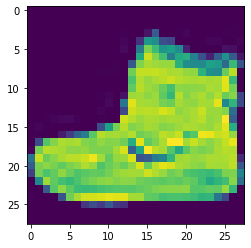

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

## Normalize

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## **Create a model for classification**

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dense(512, activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## **Fit the model**

In [22]:
model.fit(train_images, train_labels, epochs=100)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 174us/sample - loss: 0.2264 - acc: 0.9140
Epoch 2/100
60000/60000 [==============================] - 11s 187us/sample - loss: 0.2185 - acc: 0.9160
Epoch 3/100
60000/60000 [==============================] - 12s 194us/sample - loss: 0.2148 - acc: 0.9174
Epoch 4/100
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2047 - acc: 0.9218
Epoch 5/100
60000/60000 [==============================] - 12s 193us/sample - loss: 0.1990 - acc: 0.9239
Epoch 6/100
60000/60000 [==============================] - 12s 192us/sample - loss: 0.1953 - acc: 0.9245
Epoch 7/100
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1888 - acc: 0.9266
Epoch 8/100
60000/60000 [==============================] - 12s 194us/sample - loss: 0.1860 - acc: 0.9291
Epoch 9/100
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1849 - acc: 0.9290
Epoch 10/100
60000/60000 [======

## **Evaluate the model**

In [23]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 84us/sample - loss: 1.5260 - acc: 0.8911


[1.5260216387640453, 0.8911]

# **Implementing callbacks to control training**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.6:
      print('\nReached 60% accuracy so cancelling training!')
      self.model.stop_training = True


In [27]:
callbacks = myCallback()
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
59744/60000 [============================>.] - ETA: 0s - loss: 0.0726 - acc: 0.9751
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0725 - acc: 0.9752


If the cell above reports an error, make sure that you have enabled TPU support in the notebook settings. (Edit menu → Notebook settings).

Now, let's try a simple computation.

In [0]:
import numpy as np

def add_op(x, y):
  return x + y

# Silence deprecation warnings. TPUs do not yet work with TF 2.0.
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

x = tf.placeholder(tf.float32, [10,])
y = tf.placeholder(tf.float32, [10,])
tpu_ops = tf.contrib.tpu.rewrite(add_op, [x, y])

session = tf.Session(tpu_address)
try:
  print('Initializing...')
  session.run(tf.contrib.tpu.initialize_system())
  print('Running ops')
  print(session.run(tpu_ops, {x: np.arange(10), y: np.arange(10)}))
finally:
  # For now, TPU sessions must be shutdown separately from
  # closing the session.
  session.run(tf.contrib.tpu.shutdown_system())
  session.close()

Initializing...
Running ops
[array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.], dtype=float32)]


## TPU FLOPS

Finally, we'll try a small benchmark (the units are FLOPS or floating point operations per second).

In [0]:
N = 4096
COUNT = 100
import time

def flops():
  x = tf.random_uniform([N, N])
  y = tf.random_uniform([N, N])
  def _matmul(x, y):
    return tf.tensordot(x, y, axes=[[1], [0]]), y

  return tf.reduce_sum(
    tf.contrib.tpu.repeat(COUNT, _matmul, [x, y])
  )
  
tpu_ops = tf.contrib.tpu.batch_parallel(flops, [], num_shards=8)
  
session = tf.Session(tpu_address)
try:
  print('Warming up...')
  session.run(tf.contrib.tpu.initialize_system())
  session.run(tpu_ops)
  print('Profiling')
  start = time.time()
  session.run(tpu_ops)
  end = time.time()
  elapsed = end - start
  print(elapsed, 'TFlops: {:.2f}'.format(1e-12 * 8 * COUNT * 2*N*N*N / elapsed))
finally:
  session.run(tf.contrib.tpu.shutdown_system())
  session.close()

Warming up...
Profiling
0.6759042739868164 TFlops: 162.67


## Next steps

More involved examples include:
- [Shakespeare in 5 minutes with Cloud TPUs and Keras](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb)
- [Shakespeare in 5 minutes with Cloud TPUs via TPUEstimator](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpuestimator.ipynb)
- [Fashion MNIST with Keras and TPUs](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb)

We'll be sharing more examples of TPU use in Colab over time, so be sure to check back for additional example links, or [follow us on Twitter @GoogleColab](https://twitter.com/googlecolab).

Meanwhile, you can check out the [TPUEstimator documentation on TensorFlow.org](https://www.tensorflow.org/api_docs/python/tf/contrib/tpu/TPUEstimator). TPUEstimator is an easy way to update models to take advantage of TPU acceleration.